# 배치 정규화(Batch Normalization)

In [13]:
# 라이브러리 호출 및 데이터셋 내려받기
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()

In [14]:
# 데이터프레임에 데이터셋 저장
df=pd.DataFrame(iris.data,columns=iris.feature_names) # 붓꽃 데이터셋을 df에 저장
df=df.astype(float) # 데이터 형식을 float로 변환
df['label']=iris.target # 붓꽃 데이터셋의 정답에 'label'이라는 이름을 붙임
df['label']=df.label.replace(dict(enumerate(iris.target_names))) # 1

- 1 : 데이터셋의 특정 문자열을 변환
    - replace : 데이터프레임의 특정 문자열을 바꾸고 싶을 때 replace를 사용
    - 파이썬에서는 리스트, 튜플, 문자열 등 여러가지 자료형을 입력받으면 인덱스 값으 포함하는 enumerate 객체를 딕셔너리에 넣음.

In [15]:
# 원 핫 인코딩 적용
label=pd.get_dummies(df['label'],prefix='label') # 1
df=pd.concat([df,label],axis=1)
df.drop(['label'],axis=1,inplace=True) # 2

- 1 : get_dummies를 사용하여 원핫 인코딩을 수행
- 2 : drop 명령어로 열 전체를 삭제할 수 있음
    - axis=1은 열을 삭제, axis=0은 행을 삭제
    - inplace는 기존 데이터프레임의 데이터를 삭제하고, drop이 적용된 이후의 데이터프레임으로 대체하겠다는 의미
  

In [16]:
# 데이터셋 분류
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X) # sepal~width 열을 배열로 변환하여 x변수에 저장
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y) # 'label_setosa', 'label_versicolor', 'label_virginica' 열을 배열로 변환하여 y변수에 저장

In [17]:
# 데이터셋 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
# 배치 정규화가 적용되지 않은 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),# 입력층은 (4,0)의 형태를 가지며, 유닛 64개로 구성
    Dense(128, activation='relu'), # 입력층 다음으로 유닛 128개를 갖는 밀집층을 두개 구성
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'), # 유닛 64개로 구성된 밀집층이 두개 더 있으며, 렐루 활성화함수 사용
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') # 출력층은 유닛 세개로 구성되며, 소프트맥스 활성화함수로 사용
]);
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 37,763
Trainable params: 37,763
Non-trai

In [19]:
# 모델 훈련
model1.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
) # 1

history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 0s - loss: 1.0718 - accuracy: 0.5556 - val_loss: 0.9998 - val_accuracy: 0.3333 - 423ms/epoch - 141ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.9768 - accuracy: 0.4222 - val_loss: 0.9249 - val_accuracy: 0.6667 - 22ms/epoch - 7ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.8997 - accuracy: 0.6778 - val_loss: 0.8606 - val_accuracy: 0.6667 - 20ms/epoch - 7ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.8205 - accuracy: 0.6889 - val_loss: 0.7738 - val_accuracy: 0.6667 - 18ms/epoch - 6ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.7273 - accuracy: 0.6889 - val_loss: 0.6776 - val_accuracy: 0.6667 - 19ms/epoch - 6ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.6478 - accuracy: 0.8111 - val_loss: 0.5992 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.5546 - accuracy: 0.9333 - val_loss: 0.5223 - val_accuracy: 0.7333 - 18ms/epoch - 6ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.4820 - accuracy: 0.7444 - val_loss: 0.4765 - val_accuracy: 0.6667 - 16ms/epoch - 5ms/step
Epoch 9/1000
3/3 - 0s

Epoch 68/1000
3/3 - 0s - loss: 0.0981 - accuracy: 0.9667 - val_loss: 0.1147 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 69/1000
3/3 - 0s - loss: 0.0557 - accuracy: 0.9889 - val_loss: 0.2336 - val_accuracy: 0.9000 - 18ms/epoch - 6ms/step
Epoch 70/1000
3/3 - 0s - loss: 0.0867 - accuracy: 0.9444 - val_loss: 0.0988 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.0642 - accuracy: 0.9889 - val_loss: 0.0740 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 72/1000
3/3 - 0s - loss: 0.0786 - accuracy: 0.9778 - val_loss: 0.0894 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 73/1000
3/3 - 0s - loss: 0.0578 - accuracy: 0.9889 - val_loss: 0.1536 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.0623 - accuracy: 0.9778 - val_loss: 0.1154 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.0577 - accuracy: 0.9889 - val_loss: 0.0860 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 76/1000
3/

Epoch 135/1000
3/3 - 0s - loss: 0.0628 - accuracy: 0.9778 - val_loss: 0.2340 - val_accuracy: 0.9000 - 17ms/epoch - 6ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0808 - accuracy: 0.9444 - val_loss: 0.1471 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 137/1000
3/3 - 0s - loss: 0.0550 - accuracy: 0.9778 - val_loss: 0.0809 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0581 - accuracy: 0.9889 - val_loss: 0.0762 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0578 - accuracy: 0.9889 - val_loss: 0.1065 - val_accuracy: 0.9333 - 23ms/epoch - 8ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0504 - accuracy: 0.9889 - val_loss: 0.1675 - val_accuracy: 0.9333 - 21ms/epoch - 7ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0561 - accuracy: 0.9778 - val_loss: 0.1450 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0540 - accuracy: 0.9889 - val_loss: 0.0935 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 14

Epoch 202/1000
3/3 - 0s - loss: 0.0455 - accuracy: 0.9889 - val_loss: 0.1095 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 203/1000
3/3 - 0s - loss: 0.0425 - accuracy: 0.9889 - val_loss: 0.1029 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 204/1000
3/3 - 0s - loss: 0.0429 - accuracy: 0.9889 - val_loss: 0.1103 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 205/1000
3/3 - 0s - loss: 0.0428 - accuracy: 0.9889 - val_loss: 0.1253 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0430 - accuracy: 0.9889 - val_loss: 0.1363 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 207/1000
3/3 - 0s - loss: 0.0413 - accuracy: 0.9889 - val_loss: 0.1068 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 208/1000
3/3 - 0s - loss: 0.0470 - accuracy: 0.9889 - val_loss: 0.0864 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 209/1000
3/3 - 0s - loss: 0.0441 - accuracy: 0.9889 - val_loss: 0.1199 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 21

Epoch 269/1000
3/3 - 0s - loss: 0.0416 - accuracy: 0.9889 - val_loss: 0.1394 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0418 - accuracy: 0.9889 - val_loss: 0.3109 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 271/1000
3/3 - 0s - loss: 0.0552 - accuracy: 0.9778 - val_loss: 0.1862 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9889 - val_loss: 0.0834 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0398 - accuracy: 0.9889 - val_loss: 0.1690 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 274/1000
3/3 - 0s - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.2604 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0485 - accuracy: 0.9778 - val_loss: 0.1927 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 276/1000
3/3 - 0s - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.1062 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 27

Epoch 336/1000
3/3 - 0s - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.1379 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 337/1000
3/3 - 0s - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.1586 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 338/1000
3/3 - 0s - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.2279 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 339/1000
3/3 - 0s - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.2566 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 340/1000
3/3 - 0s - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.2393 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 341/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.1670 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 342/1000
3/3 - 0s - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.1691 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 343/1000
3/3 - 0s - loss: 0.0378 - accuracy: 0.9889 - val_loss: 0.3939 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 34

Epoch 403/1000
3/3 - 0s - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.4908 - val_accuracy: 0.8667 - 18ms/epoch - 6ms/step
Epoch 404/1000
3/3 - 0s - loss: 0.0606 - accuracy: 0.9778 - val_loss: 0.2505 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 405/1000
3/3 - 0s - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.1145 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 406/1000
3/3 - 0s - loss: 0.0377 - accuracy: 0.9889 - val_loss: 0.2528 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 407/1000
3/3 - 0s - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.2375 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 408/1000
3/3 - 0s - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.1354 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 409/1000
3/3 - 0s - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.1130 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 410/1000
3/3 - 0s - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.1451 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 41

Epoch 470/1000
3/3 - 0s - loss: 0.0487 - accuracy: 0.9889 - val_loss: 0.1726 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 471/1000
3/3 - 0s - loss: 0.0310 - accuracy: 0.9889 - val_loss: 0.3170 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 472/1000
3/3 - 0s - loss: 0.0326 - accuracy: 0.9889 - val_loss: 0.3384 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 473/1000
3/3 - 0s - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.2794 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 474/1000
3/3 - 0s - loss: 0.0305 - accuracy: 0.9889 - val_loss: 0.2125 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 475/1000
3/3 - 0s - loss: 0.0327 - accuracy: 0.9889 - val_loss: 0.2955 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 476/1000
3/3 - 0s - loss: 0.0271 - accuracy: 0.9889 - val_loss: 0.5214 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 477/1000
3/3 - 0s - loss: 0.0514 - accuracy: 0.9778 - val_loss: 0.3639 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 47

Epoch 537/1000
3/3 - 0s - loss: 0.0262 - accuracy: 0.9889 - val_loss: 0.4885 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 538/1000
3/3 - 0s - loss: 0.0258 - accuracy: 0.9889 - val_loss: 0.5371 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 539/1000
3/3 - 0s - loss: 0.0304 - accuracy: 0.9889 - val_loss: 0.5775 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 540/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.5673 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 541/1000
3/3 - 0s - loss: 0.0313 - accuracy: 0.9889 - val_loss: 0.3872 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 542/1000
3/3 - 0s - loss: 0.0283 - accuracy: 0.9889 - val_loss: 0.2309 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 543/1000
3/3 - 0s - loss: 0.0297 - accuracy: 0.9889 - val_loss: 0.2397 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 544/1000
3/3 - 0s - loss: 0.0293 - accuracy: 0.9889 - val_loss: 0.3310 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 54

Epoch 604/1000
3/3 - 0s - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.2308 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 605/1000
3/3 - 0s - loss: 0.0299 - accuracy: 0.9889 - val_loss: 0.3396 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 606/1000
3/3 - 0s - loss: 0.0316 - accuracy: 0.9889 - val_loss: 0.3490 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 607/1000
3/3 - 0s - loss: 0.0304 - accuracy: 0.9889 - val_loss: 0.3225 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 608/1000
3/3 - 0s - loss: 0.0284 - accuracy: 0.9889 - val_loss: 0.2706 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 609/1000
3/3 - 0s - loss: 0.0282 - accuracy: 0.9889 - val_loss: 0.2347 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 610/1000
3/3 - 0s - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.2120 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 611/1000
3/3 - 0s - loss: 0.0297 - accuracy: 0.9889 - val_loss: 0.2385 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 61

Epoch 671/1000
3/3 - 0s - loss: 0.0398 - accuracy: 0.9889 - val_loss: 0.2110 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 672/1000
3/3 - 0s - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.3297 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 673/1000
3/3 - 0s - loss: 0.0293 - accuracy: 0.9889 - val_loss: 0.5043 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 674/1000
3/3 - 0s - loss: 0.0277 - accuracy: 0.9778 - val_loss: 0.4550 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 675/1000
3/3 - 0s - loss: 0.0192 - accuracy: 0.9889 - val_loss: 0.1514 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 676/1000
3/3 - 0s - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0912 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 677/1000
3/3 - 0s - loss: 0.0422 - accuracy: 0.9889 - val_loss: 0.2265 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 678/1000
3/3 - 0s - loss: 0.0275 - accuracy: 0.9889 - val_loss: 0.3904 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 67

Epoch 738/1000
3/3 - 0s - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0671 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 739/1000
3/3 - 0s - loss: 0.1038 - accuracy: 0.9556 - val_loss: 0.0714 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 740/1000
3/3 - 0s - loss: 0.0978 - accuracy: 0.9556 - val_loss: 0.0818 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 741/1000
3/3 - 0s - loss: 0.0423 - accuracy: 0.9889 - val_loss: 0.2533 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 742/1000
3/3 - 0s - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.3077 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 743/1000
3/3 - 0s - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.1560 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 744/1000
3/3 - 0s - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.0922 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 745/1000
3/3 - 0s - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0981 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 74

Epoch 805/1000
3/3 - 0s - loss: 0.0221 - accuracy: 0.9889 - val_loss: 0.5188 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 806/1000
3/3 - 0s - loss: 0.0272 - accuracy: 0.9889 - val_loss: 0.4698 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 807/1000
3/3 - 0s - loss: 0.0219 - accuracy: 0.9889 - val_loss: 0.3924 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 808/1000
3/3 - 0s - loss: 0.0221 - accuracy: 0.9889 - val_loss: 0.3620 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 809/1000
3/3 - 0s - loss: 0.0244 - accuracy: 0.9889 - val_loss: 0.3614 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 810/1000
3/3 - 0s - loss: 0.0237 - accuracy: 0.9889 - val_loss: 0.4546 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 811/1000
3/3 - 0s - loss: 0.0245 - accuracy: 0.9889 - val_loss: 0.4753 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 812/1000
3/3 - 0s - loss: 0.0198 - accuracy: 0.9889 - val_loss: 0.3795 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 81

Epoch 872/1000
3/3 - 0s - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.2075 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 873/1000
3/3 - 0s - loss: 0.0421 - accuracy: 0.9778 - val_loss: 0.4303 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 874/1000
3/3 - 0s - loss: 0.0549 - accuracy: 0.9667 - val_loss: 0.2697 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 875/1000
3/3 - 0s - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0898 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 876/1000
3/3 - 0s - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.0696 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 877/1000
3/3 - 0s - loss: 0.0506 - accuracy: 0.9778 - val_loss: 0.0750 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 878/1000
3/3 - 0s - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.1237 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 879/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.2709 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 88

Epoch 939/1000
3/3 - 0s - loss: 0.0231 - accuracy: 0.9889 - val_loss: 0.4670 - val_accuracy: 0.9333 - 26ms/epoch - 9ms/step
Epoch 940/1000
3/3 - 0s - loss: 0.0279 - accuracy: 0.9889 - val_loss: 0.6974 - val_accuracy: 0.8667 - 19ms/epoch - 6ms/step
Epoch 941/1000
3/3 - 0s - loss: 0.0657 - accuracy: 0.9556 - val_loss: 0.1868 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 942/1000
3/3 - 0s - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0664 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 943/1000
3/3 - 0s - loss: 0.0506 - accuracy: 0.9778 - val_loss: 0.1305 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 944/1000
3/3 - 0s - loss: 0.0279 - accuracy: 0.9889 - val_loss: 0.3307 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 945/1000
3/3 - 0s - loss: 0.0233 - accuracy: 0.9889 - val_loss: 0.4494 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 946/1000
3/3 - 0s - loss: 0.0277 - accuracy: 0.9889 - val_loss: 0.5002 - val_accuracy: 0.9333 - 16ms/epoch - 5ms/step
Epoch 94

- 1 : 옵티마이저로 아담 알고리즘을 적용하고, 손실함수로 크로스엔트로피를 적용

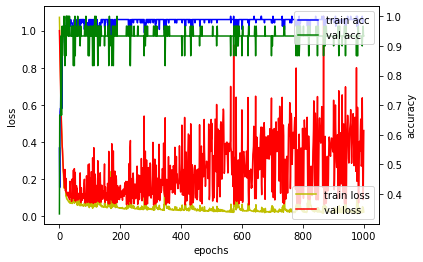

In [23]:
# 훈련 결과 시각화
%matplotlib inline # 1
import matplotlib.pyplot as plt

fig,loss_ax=plt.subplots() # subplots는 한번에 여러 그래프를 보여주는데 사용

acc_ax=loss_ax.twinx() # twinx()를 사용하여 y축이 2개있는 플롯 구성

loss_ax.plot(history1.history['loss'],'y',label='train loss') # 2
loss_ax.plot(history1.history['val_loss'],'r',label='val loss') # plot는 선또는 마커 그래프 그리기에 사용되는 함수

acc_ax.plot(history1.history['accuracy'],'b',label='train acc')
acc_ax.plot(history1.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epochs') # x축 라벨
loss_ax.set_ylabel('loss') # y축 라벨
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

- 1 : matplotlib inline은 주피터 노트북을 실행한 웹 브라우저에서 바로 그림 형태로 출력 결과를 보여줄 수 있게 해줌
- 2 : 모델을 학습시키기 위해 fit() 메서드를 사용하며, 이때 반환값으로 학습 이력(history) 정보가 반환

In [24]:
# 정확도와 손실 정보 표현
loss_and_metrics=model1.evaluate(X_test,y_test)
print('## 손실과 정확도 평가 ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 17ms/step - loss: 0.0819 - accuracy: 0.9333
## 손실과 정확도 평가 ##
[0.08191316574811935, 0.9333333373069763]


In [26]:
# 배치 정규화가 적용된 모델 생성
from tensorflow.keras.initializers import RandomNormal, Constant
model2 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ), # 1
    Dense(3, activation='softmax')
]);
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)             

- 1 : 배치 정규화에서 사용된 파라미터
    - momentum : 엄청나게 많은 전체 훈련 데이터셋에 대한 평균과 표준편차를 계산하는 것이 어렵기 때문에, 미니 배치마다 평균과 표준편차를 구해서 전체 훈련 데이터셋의 평균과 표준편차로 대체, 하지만 배치 정규화에서는 이 방법 대신 모델 학습 단계에서 지수 감소를 이용하는 이동 평균법을 사용해 평균과 표준편차를 계산,
    - 앞의 식은 모멘텀 값으로 일반적으로 1에 가까운 0.9,0.99,0.999로 설정하고, 이러한 이동평균과 이동 표준편차는 학습 단계에서 모든 미니 배치마다 업데이터해줌
    - epsilon : 분산이 0으로 계산되는 것을 방지하기 위해 분산에 추가되는 작은 실수 값
    - beta_initializer : 베타 가중치 초기값
    - gamma_initializer : 감마 가중치 초기값

In [28]:
# 모델 훈련
model2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 1s - loss: 0.8722 - accuracy: 0.6667 - val_loss: 1.1018 - val_accuracy: 0.3333 - 836ms/epoch - 279ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.1715 - accuracy: 0.9556 - val_loss: 1.0849 - val_accuracy: 0.3333 - 22ms/epoch - 7ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.1255 - accuracy: 0.9778 - val_loss: 1.0787 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.0953 - accuracy: 0.9667 - val_loss: 1.0800 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.0721 - accuracy: 0.9778 - val_loss: 1.0888 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.1070 - accuracy: 0.9667 - val_loss: 1.1047 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0355 - accuracy: 0.9889 - val_loss: 1.1289 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0457 - accuracy: 0.9889 - val_loss: 1.1566 - val_accuracy: 0.3333 - 18ms/epoch - 6ms/step
Epoch 9/1000
3/3 - 0s

Epoch 68/1000
3/3 - 0s - loss: 0.0267 - accuracy: 0.9889 - val_loss: 0.5630 - val_accuracy: 0.7333 - 19ms/epoch - 6ms/step
Epoch 69/1000
3/3 - 0s - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.4407 - val_accuracy: 0.7667 - 19ms/epoch - 6ms/step
Epoch 70/1000
3/3 - 0s - loss: 0.0550 - accuracy: 0.9778 - val_loss: 0.3858 - val_accuracy: 0.8333 - 18ms/epoch - 6ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.0318 - accuracy: 0.9889 - val_loss: 0.3908 - val_accuracy: 0.8000 - 19ms/epoch - 6ms/step
Epoch 72/1000
3/3 - 0s - loss: 0.0259 - accuracy: 0.9889 - val_loss: 0.3656 - val_accuracy: 0.8333 - 20ms/epoch - 7ms/step
Epoch 73/1000
3/3 - 0s - loss: 0.0816 - accuracy: 0.9778 - val_loss: 0.3157 - val_accuracy: 0.8667 - 18ms/epoch - 6ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.0342 - accuracy: 0.9778 - val_loss: 0.2587 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.0850 - accuracy: 0.9444 - val_loss: 0.2113 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 76/1000
3/

Epoch 135/1000
3/3 - 0s - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.1736 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.1474 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 137/1000
3/3 - 0s - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.1250 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0147 - accuracy: 0.9889 - val_loss: 0.1089 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0217 - accuracy: 0.9889 - val_loss: 0.0986 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9778 - val_loss: 0.1021 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 14

Epoch 202/1000
3/3 - 0s - loss: 0.0664 - accuracy: 0.9778 - val_loss: 0.0959 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 203/1000
3/3 - 0s - loss: 0.0211 - accuracy: 0.9889 - val_loss: 0.0670 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 204/1000
3/3 - 0s - loss: 0.0772 - accuracy: 0.9889 - val_loss: 0.0602 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 205/1000
3/3 - 0s - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.1135 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0679 - accuracy: 0.9667 - val_loss: 0.2034 - val_accuracy: 0.8667 - 18ms/epoch - 6ms/step
Epoch 207/1000
3/3 - 0s - loss: 0.0605 - accuracy: 0.9778 - val_loss: 0.1728 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 208/1000
3/3 - 0s - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.2492 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 209/1000
3/3 - 0s - loss: 0.0629 - accuracy: 0.9889 - val_loss: 0.3356 - val_accuracy: 0.9000 - 18ms/epoch - 6ms/step
Epoch 21

Epoch 269/1000
3/3 - 0s - loss: 0.0479 - accuracy: 0.9889 - val_loss: 0.3656 - val_accuracy: 0.8333 - 19ms/epoch - 6ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 271/1000
3/3 - 0s - loss: 0.0482 - accuracy: 0.9778 - val_loss: 0.0661 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0295 - accuracy: 0.9778 - val_loss: 0.0745 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 274/1000
3/3 - 0s - loss: 0.0774 - accuracy: 0.9778 - val_loss: 0.0757 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0309 - accuracy: 0.9889 - val_loss: 0.1170 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 276/1000
3/3 - 0s - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2932 - val_accuracy: 0.8667 - 20ms/epoch - 7ms/step
Epoch 27

Epoch 336/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 337/1000
3/3 - 0s - loss: 0.0274 - accuracy: 0.9889 - val_loss: 0.0856 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 338/1000
3/3 - 0s - loss: 0.0404 - accuracy: 0.9889 - val_loss: 0.1143 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 339/1000
3/3 - 0s - loss: 0.0328 - accuracy: 0.9889 - val_loss: 0.1359 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 340/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9889 - val_loss: 0.1389 - val_accuracy: 0.9000 - 18ms/epoch - 6ms/step
Epoch 341/1000
3/3 - 0s - loss: 0.0217 - accuracy: 0.9889 - val_loss: 0.1202 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 342/1000
3/3 - 0s - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 343/1000
3/3 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 34

Epoch 403/1000
3/3 - 0s - loss: 0.0141 - accuracy: 0.9889 - val_loss: 0.0234 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 404/1000
3/3 - 0s - loss: 0.0223 - accuracy: 0.9889 - val_loss: 0.0165 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 405/1000
3/3 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 406/1000
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 407/1000
3/3 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 408/1000
3/3 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 409/1000
3/3 - 0s - loss: 0.0450 - accuracy: 0.9778 - val_loss: 0.0175 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 410/1000
3/3 - 0s - loss: 0.0265 - accuracy: 0.9889 - val_loss: 0.0242 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 41

Epoch 470/1000
3/3 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 471/1000
3/3 - 0s - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0398 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 472/1000
3/3 - 0s - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 473/1000
3/3 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 474/1000
3/3 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 475/1000
3/3 - 0s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 476/1000
3/3 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 477/1000
3/3 - 0s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 47

Epoch 537/1000
3/3 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.1592 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 538/1000
3/3 - 0s - loss: 0.0165 - accuracy: 0.9889 - val_loss: 0.1762 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 539/1000
3/3 - 0s - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.2009 - val_accuracy: 0.9333 - 21ms/epoch - 7ms/step
Epoch 540/1000
3/3 - 0s - loss: 0.1074 - accuracy: 0.9667 - val_loss: 0.1982 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 541/1000
3/3 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1733 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 542/1000
3/3 - 0s - loss: 0.0635 - accuracy: 0.9889 - val_loss: 0.1872 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 543/1000
3/3 - 0s - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.2198 - val_accuracy: 0.9333 - 21ms/epoch - 7ms/step
Epoch 544/1000
3/3 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.2468 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 54

Epoch 604/1000
3/3 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.8667 - 20ms/epoch - 7ms/step
Epoch 605/1000
3/3 - 0s - loss: 0.1175 - accuracy: 0.9778 - val_loss: 0.2330 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 606/1000
3/3 - 0s - loss: 0.0117 - accuracy: 0.9889 - val_loss: 0.1899 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 607/1000
3/3 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2581 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 608/1000
3/3 - 0s - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 609/1000
3/3 - 0s - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.3535 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 610/1000
3/3 - 0s - loss: 0.0230 - accuracy: 0.9889 - val_loss: 0.3600 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 611/1000
3/3 - 0s - loss: 0.0561 - accuracy: 0.9778 - val_loss: 0.3272 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 61

Epoch 671/1000
3/3 - 0s - loss: 0.0209 - accuracy: 0.9889 - val_loss: 0.2469 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 672/1000
3/3 - 0s - loss: 0.0450 - accuracy: 0.9889 - val_loss: 0.2821 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 673/1000
3/3 - 0s - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2995 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 674/1000
3/3 - 0s - loss: 0.0278 - accuracy: 0.9778 - val_loss: 0.2641 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 675/1000
3/3 - 0s - loss: 0.0229 - accuracy: 0.9889 - val_loss: 0.2088 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 676/1000
3/3 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9333 - 19ms/epoch - 6ms/step
Epoch 677/1000
3/3 - 0s - loss: 0.0463 - accuracy: 0.9667 - val_loss: 0.2098 - val_accuracy: 0.9000 - 19ms/epoch - 6ms/step
Epoch 678/1000
3/3 - 0s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.2745 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 67

Epoch 738/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1715 - val_accuracy: 0.9667 - 21ms/epoch - 7ms/step
Epoch 739/1000
3/3 - 0s - loss: 0.0271 - accuracy: 0.9889 - val_loss: 0.1900 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 740/1000
3/3 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2146 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 741/1000
3/3 - 0s - loss: 0.0758 - accuracy: 0.9778 - val_loss: 0.2137 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 742/1000
3/3 - 0s - loss: 0.0586 - accuracy: 0.9889 - val_loss: 0.1931 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 743/1000
3/3 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1809 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 744/1000
3/3 - 0s - loss: 0.0793 - accuracy: 0.9778 - val_loss: 0.1837 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 745/1000
3/3 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1884 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 74

Epoch 805/1000
3/3 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1827 - val_accuracy: 0.9333 - 20ms/epoch - 7ms/step
Epoch 806/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 807/1000
3/3 - 0s - loss: 0.0143 - accuracy: 0.9889 - val_loss: 0.1475 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 808/1000
3/3 - 0s - loss: 0.0803 - accuracy: 0.9889 - val_loss: 0.1491 - val_accuracy: 0.9667 - 21ms/epoch - 7ms/step
Epoch 809/1000
3/3 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 810/1000
3/3 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.2231 - val_accuracy: 0.9000 - 21ms/epoch - 7ms/step
Epoch 811/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2555 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 812/1000
3/3 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2649 - val_accuracy: 0.9000 - 20ms/epoch - 7ms/step
Epoch 81

Epoch 872/1000
3/3 - 0s - loss: 0.0109 - accuracy: 0.9889 - val_loss: 0.0850 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 873/1000
3/3 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 874/1000
3/3 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 875/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 876/1000
3/3 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1119 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 877/1000
3/3 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 878/1000
3/3 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 879/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1109 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 88

Epoch 939/1000
3/3 - 0s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 940/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 941/1000
3/3 - 0s - loss: 0.0709 - accuracy: 0.9889 - val_loss: 0.0527 - val_accuracy: 0.9667 - 20ms/epoch - 7ms/step
Epoch 942/1000
3/3 - 0s - loss: 0.0147 - accuracy: 0.9889 - val_loss: 0.0434 - val_accuracy: 1.0000 - 20ms/epoch - 7ms/step
Epoch 943/1000
3/3 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 1.0000 - 21ms/epoch - 7ms/step
Epoch 944/1000
3/3 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 1.0000 - 22ms/epoch - 7ms/step
Epoch 945/1000
3/3 - 0s - loss: 0.0294 - accuracy: 0.9889 - val_loss: 0.0471 - val_accuracy: 1.0000 - 22ms/epoch - 7ms/step
Epoch 946/1000
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 1.0000 - 21ms/epoch - 7ms/step
Epoch 94

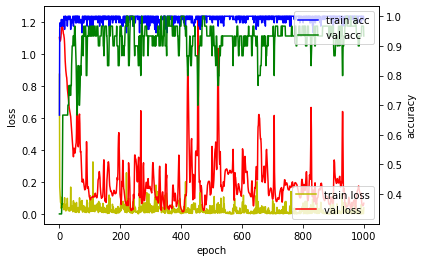

In [29]:
# 훈련 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig,loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [30]:
# 모델 평가
loss_and_metrics = model2.evaluate(X_test, y_test)
print('## 손실과 정확도 평가  ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 0s/step - loss: 0.0179 - accuracy: 1.0000
## 손실과 정확도 평가  ##
[0.01793276146054268, 1.0]


# 드롭 아웃을 이용한 성능 최적화

In [33]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-metadata 1.5.0 requires absl-py<0.13,>=0.9, but you'll have absl-py 0.15.0 which is incompatible.


In [34]:
# 라이브러리 호출
import tensorflow_datasets as tfds
import tensorflow as tf

In [36]:
# 데이터셋 내려받기
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True) # 1
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes) # 2
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

Dataset imdb_reviews downloaded and prepared to C:\Users\이신행\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


- 1 : tensorflow_datasets 라이브러리는 다음 메서드를 제공함
     - list_builders() : 데이터 목록 출력
     - load() 데이터 로드
     여기서는 load() 메서드를 사용하여 데잉터셋을 내려받은 후, 훈련과 검증용으로 데이터 분리
     - tfds.load('imdb_reviews/subwords8k', split = (tfds.Split.TRAIN, tfds.Split.TEST), with_info=True, as_supervised=True)에서
     - 'imdb_reviews/subwords8k' : 내려받을 데이터셋의 이름 지정
     - split : 내려받은 데이터셋을 훈련과 검증용으로 분리
     - with_info=True : 전체 데이터에 대한 메타 정보도 함께 불러옴
     - as_supervised=True : 데이터를 (input,label) 튜플 형태로 반환
- 2 : padded_batch메서드는 배치에서 가장 긴 문자열의 길이를 기준으로 시퀀스를 0으로 채움

In [37]:
# 데이터 배열로 변환
train_batch,train_labels=next(iter(train_batches)) # iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례로 꺼냄
train_batch.numpy() # 배열로 변환

array([[ 173,   29,    4, ...,    0,    0,    0],
       [3953,  579,  177, ...,    0,    0,    0],
       [  62,    9,  547, ...,    0,    0,    0],
       ...,
       [  12,  118,  284, ...,    0,    0,    0],
       [  12,  258, 2599, ...,    0,    0,    0],
       [2518,  148,   63, ...,    0,    0,    0]], dtype=int64)

In [38]:
# 드롭 아웃이 적용되지 않은 모델
encoder=info.features['text'].encoder
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size,64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
]) # 1

- 1 : 임베딩층은 단어당 하나의 벡터 저장, 임베딩이 호출되면 단어 인덱스 시퀀스를 벡터 시퀀스로 변환. 훈련 후 유사한 의미를 가진 단어는 종종 유사한 벡터를 가짐. 임베딩 층 다음으로 RNN의 변형인 LSTM층이 있음. LSTM층은 유닛 64개로 구성되어있고, 이후에 유닛 64개로 구성된 밀집층이 존재하며, 렐루 활성화 함수를 사용. 또한 마지막으로 출력층은 하나의 유닛으로 구성되며, 소프트맥스 활성화 함수로 사용

In [41]:
# 모델 훈련
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history=model.fit(train_batches,epochs=5,validation_data=test_batches,validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 514s 205ms/step - loss: 0.6930 - accuracy: 0.5021 - val_loss: 0.6921 - val_accuracy: 0.5533
Epoch 2/5
2500/2500 [==============================] - 519s 208ms/step - loss: 0.6897 - accuracy: 0.5167 - val_loss: 0.6884 - val_accuracy: 0.5033
Epoch 3/5
2500/2500 [==============================] - 518s 207ms/step - loss: 0.6728 - accuracy: 0.5421 - val_loss: 0.6787 - val_accuracy: 0.5400
Epoch 4/5
2500/2500 [==============================] - 523s 209ms/step - loss: 0.6571 - accuracy: 0.5487 - val_loss: 0.6725 - val_accuracy: 0.5100
Epoch 5/5
2500/2500 [==============================] - 1590s 636ms/step - loss: 0.6662 - accuracy: 0.5642 - val_loss: 0.6348 - val_accuracy: 0.5967


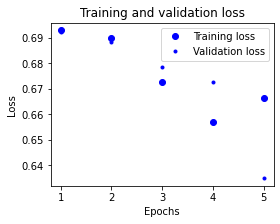

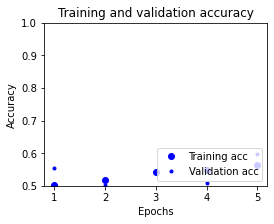

In [45]:
# 훈련 결과 시각화
BUFFER_SIZE=10000
BATCH_SIZE=64
train_dataset=train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict=history.history # 학습 이력 정보를 history_dict에 저장
acc=history_dict['accuracy'] # history_dict에 저장된 accuracy를 acc에 저장
val_acc=history_dict['val_accuracy'] # history_dict에 저장된 val_accuracy 데이터를 val_acc에 저장
loss=history_dict['loss'] # history_dict에 저장된 loss 데이터를 loss에 저장
val_loss=history_dict['val_loss'] # history_dict에 저장된 val_loss를 val_loss에 저장
epochs=range(1,len(acc)+1) # 에포크 지정
plt.figure(figsize=(4,3)) # figure는 그래프 크기를 지칭하는 것으로 가로 4인치, 세로 3인치로 설정
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b.',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b.',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

- 결과가 정상적으로 보이지 않음. 검증에 대한 손실이 네번째 에포크에서 다시 높아지고 있음
- 정확도 역시 낮음

In [46]:
# 들보앙수이 적용된 모델 (성능 향상을 위해 LSTM 대신 Bidirectional RNN로 바꿈)
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # LSTM 대신 양방향 RNN 사용
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.5), # 1
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

- 1 : 드롭아웃을 적용하며(랜덤하게 노드를 끄는 비율을 50%), 주의할 점은 학습할때만 드롭아웃을 사용해야 한다는 것. 따라서 정확도를 측정할 때에는 모든 노드를 사용해야 함

In [47]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 1507s 601ms/step - loss: 0.5451 - accuracy: 0.7004 - val_loss: 0.5234 - val_accuracy: 0.7467
Epoch 2/5
2500/2500 [==============================] - 1487s 595ms/step - loss: 0.3318 - accuracy: 0.8714 - val_loss: 0.3442 - val_accuracy: 0.8400
Epoch 3/5
2500/2500 [==============================] - 1497s 599ms/step - loss: 0.2440 - accuracy: 0.9161 - val_loss: 0.3416 - val_accuracy: 0.8600
Epoch 4/5
2500/2500 [==============================] - 1452s 581ms/step - loss: 0.2075 - accuracy: 0.9300 - val_loss: 0.4305 - val_accuracy: 0.8500
Epoch 5/5
2500/2500 [==============================] - 2052s 821ms/step - loss: 0.1816 - accuracy: 0.9423 - val_loss: 0.4809 - val_accuracy: 0.8333


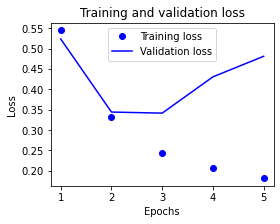

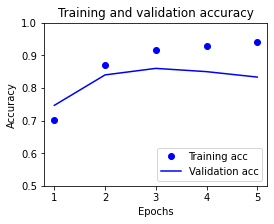

In [48]:
# 훈련에 대한 시각화
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [49]:
# 드롭아웃 제거하고 양방향 RNN만 적용한 
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델 훈련
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history=model.fit(train_batches,epochs=5,validation_data=test_batches,validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 2473s 989ms/step - loss: 0.4825 - accuracy: 0.7464 - val_loss: 0.3571 - val_accuracy: 0.8533
Epoch 2/5
2500/2500 [==============================] - 2645s 1s/step - loss: 0.2694 - accuracy: 0.8987 - val_loss: 0.3235 - val_accuracy: 0.8800
Epoch 3/5
2500/2500 [==============================] - 839s 335ms/step - loss: 0.2364 - accuracy: 0.9158 - val_loss: 0.3737 - val_accuracy: 0.8733
Epoch 4/5
2500/2500 [==============================] - 841s 337ms/step - loss: 0.1907 - accuracy: 0.9346 - val_loss: 0.3471 - val_accuracy: 0.8800
Epoch 5/5
2500/2500 [==============================] - 1714s 686ms/step - loss: 0.1695 - accuracy: 0.9426 - val_loss: 0.3476 - val_accuracy: 0.8767


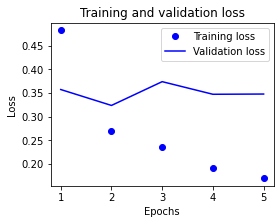

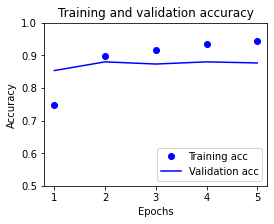

In [51]:
# 모델 훈련에 대한 시각화
BUFFER_SIZE=10000
BATCH_SIZE=64
trian_dataset=train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

- 정확도는 높아지지만, 검증에 대한 손실 역시 높아짐

# 조기종료를 이용한 성능 최적화

In [52]:
# 라이브러리 호출
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

In [53]:
# 하이퍼파라미터 초기화
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 300
np.random.seed(7)

In [54]:
# 체크포인트 설정
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1)# 1

- 1 : 훈련하는 동안 체크포인트를 지정하기 위해 tf.keras.callbacks.ModelCheckpoint 콜백 함수를 사용함. 콜백함수는 훈련 중간과 마지막에 체크포인트를 지정하는데 가장 많이 사용하는 방법임. 또한 다시 훈련하지 않고 모델을 재사용하거나 의도치않게 훈련이 중지된 경우 이어서 훈련할 수 있음

In [55]:
# 데이터셋 메모리로 로딩
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=sequence.pad_sequences(x_train, maxlen=maxlen) # 모양이 같은 벡터를 만들기 위해 0으로 시퀀스를 채움
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [56]:
# 모델 생성
model=Sequential()
model.add(Embedding(max_features,
                   embedding_dims,
                   input_length=maxlen)) # 1
model.add(Dropout(0.2)) # 무작위로 20%의 뉴런을 다음 층의 입력에서 무시
model.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1)) # 2
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 50)           250000    
                                                                 
 dropout_1 (Dropout)         (None, 400, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 398, 250)          37750     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_30 (Dense)            (None, 250)               62750     
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                      

- 1 : 임베딩은 텍스트를 양의 정수로 변환해 주는 역할을 하며, 파라미터는 다음과 같음
    - max_features : 단어 사전의 크기로, 단어 종류가 5000개, 이 값은 imdb.load_data() 메서드의 num_words 파라미터 값과 동일해야 함
    - embedding_dims : 단어를 인코딩 한 후 나오는 벡터 크기, 이 값이 50이라면, 단어가 50차원의 기하 공간에 표현된거임
    - input_length : 단어 수, 즉 문장 길이. 임베딩층 다음 플래튼 층이 온다면 반드시 input_length를 지정해줘야 함. 플래튼층이라면 입력 크기를 알아야 이를 1차원적으로 만들어서 밀집층에 전달할 수 있기 때문
- 2 : 문장 해석을 위해 합성곱층(Conv1D) 이용, 합성곱층은 위치를 무시하고 지역적인 특성을 잘 뽑아내야함. 합성곱을 문장에 적용한다면, 주요 단어가 문장앞뒤에 있더라도 전후 문맥을 고려하여 특성을 뽑아낼 수 있음. 글로벌 최대 풀링(GlobalMaxPooling)층은 합성곱층이 문장을 훑어가면서 뽑아낸 특성 벡터 중 가장 큰 벡터를 선택, 즉 문맥을 보면서 주요 특성을 뽑아내고, 그중 가장 두드러지는 특성을 선택함

In [57]:
# 조기종료가 추가되지 않은 모델 훈련
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_split=0.2,
         callbacks=[cp_callback])

Epoch 1/300
625/625 [==============================] - ETA: 0s - loss: 0.4325 - accuracy: 0.7803
Epoch 00001: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 61ms/step - loss: 0.4325 - accuracy: 0.7803 - val_loss: 0.2939 - val_accuracy: 0.8802
Epoch 2/300
625/625 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9007
Epoch 00002: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.2447 - accuracy: 0.9007 - val_loss: 0.2625 - val_accuracy: 0.8956
Epoch 3/300
625/625 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9348
Epoch 00003: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.1681 - accuracy: 0.9348 - val_loss: 0.2758 - val_accuracy: 0.8902
Epoch 4/300
625/625 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9579
Epoch 00004: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.1143 - accuracy: 0.9579 - val_loss: 0.3128 - val_accuracy: 0.8906
Epoch 5/300
625/625 [==============================] - ETA: 0s - loss: 0.0724 - accuracy: 0.9750
Epoch 00005: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0724 - accuracy: 0.9750 - val_loss: 0.3562 - val_accuracy: 0.8934
Epoch 6/300
625/625 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9814
Epoch 00006: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 60ms/step - loss: 0.0520 - accuracy: 0.9814 - val_loss: 0.4170 - val_accuracy: 0.8812
Epoch 7/300
625/625 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9871
Epoch 00007: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.4583 - val_accuracy: 0.8832
Epoch 8/300
625/625 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9883
Epoch 00008: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0325 - accuracy: 0.9883 - val_loss: 0.5059 - val_accuracy: 0.8772
Epoch 9/300
625/625 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9908
Epoch 00009: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.5013 - val_accuracy: 0.8878
Epoch 10/300
625/625 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9901
Epoch 00010: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0273 - accuracy: 0.9901 - val_loss: 0.5324 - val_accuracy: 0.8874
Epoch 11/300
625/625 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9887
Epoch 00011: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0289 - accuracy: 0.9887 - val_loss: 0.5659 - val_accuracy: 0.8856
Epoch 12/300
625/625 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9928
Epoch 00012: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.5565 - val_accuracy: 0.8830
Epoch 13/300
624/625 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9926
Epoch 00013: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0204 - accuracy: 0.9926 - val_loss: 0.5136 - val_accuracy: 0.8884
Epoch 14/300
625/625 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9922
Epoch 00014: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.5574 - val_accuracy: 0.8870
Epoch 15/300
625/625 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9951
Epoch 00015: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.6707 - val_accuracy: 0.8810
Epoch 16/300
625/625 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9930
Epoch 00016: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0189 - accuracy: 0.9930 - val_loss: 0.6365 - val_accuracy: 0.8832
Epoch 17/300
625/625 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9928
Epoch 00017: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0195 - accuracy: 0.9928 - val_loss: 0.5916 - val_accuracy: 0.8840
Epoch 18/300
625/625 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9950
Epoch 00018: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 60ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.6304 - val_accuracy: 0.8860
Epoch 19/300
625/625 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9935
Epoch 00019: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0156 - accuracy: 0.9935 - val_loss: 0.6840 - val_accuracy: 0.8820
Epoch 20/300
625/625 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9935
Epoch 00020: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0177 - accuracy: 0.9935 - val_loss: 0.6336 - val_accuracy: 0.8854
Epoch 21/300
625/625 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9941
Epoch 00021: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.6966 - val_accuracy: 0.8822
Epoch 22/300
625/625 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9948
Epoch 00022: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 61ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.6358 - val_accuracy: 0.8834
Epoch 23/300
625/625 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9941
Epoch 00023: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0159 - accuracy: 0.9941 - val_loss: 0.6131 - val_accuracy: 0.8898
Epoch 24/300
625/625 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9946
Epoch 00024: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 60ms/step - loss: 0.0144 - accuracy: 0.9946 - val_loss: 0.6217 - val_accuracy: 0.8832
Epoch 25/300
625/625 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9951
Epoch 00025: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.6769 - val_accuracy: 0.8840
Epoch 26/300
625/625 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9967
Epoch 00026: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.6673 - val_accuracy: 0.8838
Epoch 27/300
625/625 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9956
Epoch 00027: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.7543 - val_accuracy: 0.8858
Epoch 28/300
625/625 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9951
Epoch 00028: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0132 - accuracy: 0.9951 - val_loss: 0.6702 - val_accuracy: 0.8834
Epoch 29/300
625/625 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9961
Epoch 00029: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.6995 - val_accuracy: 0.8872
Epoch 30/300
625/625 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9955
Epoch 00030: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 60ms/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 0.8125 - val_accuracy: 0.8806
Epoch 31/300
625/625 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9961
Epoch 00031: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.7342 - val_accuracy: 0.8808
Epoch 32/300
625/625 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9966
Epoch 00032: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.7007 - val_accuracy: 0.8842
Epoch 33/300
625/625 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9964
Epoch 00033: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.6618 - val_accuracy: 0.8808
Epoch 34/300
625/625 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9969
Epoch 00034: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.7279 - val_accuracy: 0.8848
Epoch 35/300
625/625 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9954
Epoch 00035: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 61ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.7515 - val_accuracy: 0.8852
Epoch 36/300
625/625 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9967
Epoch 00036: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0084 - accuracy: 0.9967 - val_loss: 0.7449 - val_accuracy: 0.8882
Epoch 37/300
625/625 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9969
Epoch 00037: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.8294 - val_accuracy: 0.8836
Epoch 38/300
625/625 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9959
Epoch 00038: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.8309 - val_accuracy: 0.8800
Epoch 39/300
625/625 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9965
Epoch 00039: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0093 - accuracy: 0.9965 - val_loss: 0.8120 - val_accuracy: 0.8750
Epoch 40/300
625/625 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963
Epoch 00040: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.7607 - val_accuracy: 0.8880
Epoch 41/300
625/625 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9973
Epoch 00041: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.7726 - val_accuracy: 0.8856
Epoch 42/300
625/625 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9979
Epoch 00042: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.7895 - val_accuracy: 0.8860
Epoch 43/300
625/625 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9966
Epoch 00043: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.7333 - val_accuracy: 0.8892
Epoch 44/300
625/625 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9972
Epoch 00044: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.6951 - val_accuracy: 0.8862
Epoch 45/300
625/625 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9983
Epoch 00045: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.8330 - val_accuracy: 0.8888
Epoch 46/300
625/625 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9977
Epoch 00046: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.7799 - val_accuracy: 0.8886
Epoch 47/300
625/625 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9970
Epoch 00047: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.8245 - val_accuracy: 0.8774
Epoch 48/300
625/625 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9970
Epoch 00048: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0074 - accuracy: 0.9970 - val_loss: 0.8137 - val_accuracy: 0.8852
Epoch 49/300
625/625 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9976
Epoch 00049: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.7865 - val_accuracy: 0.8846
Epoch 50/300
625/625 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9980
Epoch 00050: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.7403 - val_accuracy: 0.8872
Epoch 51/300
625/625 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9975
Epoch 00051: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 60ms/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 0.7713 - val_accuracy: 0.8852
Epoch 52/300
625/625 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9969
Epoch 00052: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.8491 - val_accuracy: 0.8776
Epoch 53/300
625/625 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9980
Epoch 00053: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.8870 - val_accuracy: 0.8822
Epoch 54/300
625/625 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9972
Epoch 00054: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 59ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.7021 - val_accuracy: 0.8798
Epoch 55/300
625/625 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9984
Epoch 00055: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.8928 - val_accuracy: 0.8784
Epoch 56/300
625/625 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9979
Epoch 00056: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.7446 - val_accuracy: 0.8872
Epoch 57/300
625/625 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9984
Epoch 00057: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.8523 - val_accuracy: 0.8806
Epoch 58/300
625/625 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9976
Epoch 00058: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.7739 - val_accuracy: 0.8866
Epoch 59/300
625/625 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9973
Epoch 00059: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.7381 - val_accuracy: 0.8846
Epoch 60/300
625/625 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9967
Epoch 00060: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.7496 - val_accuracy: 0.8842
Epoch 61/300
625/625 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9981
Epoch 00061: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.8502 - val_accuracy: 0.8822
Epoch 62/300
625/625 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9980
Epoch 00062: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.8550 - val_accuracy: 0.8862
Epoch 63/300
625/625 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9988
Epoch 00063: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.9517 - val_accuracy: 0.8824
Epoch 64/300
625/625 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9980
Epoch 00064: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.8629 - val_accuracy: 0.8802
Epoch 65/300
625/625 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979
Epoch 00065: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.7923 - val_accuracy: 0.8808
Epoch 66/300
625/625 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980
Epoch 00066: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.7884 - val_accuracy: 0.8826
Epoch 67/300
625/625 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9985
Epoch 00067: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.9764 - val_accuracy: 0.8814
Epoch 68/300
625/625 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9983
Epoch 00068: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.8726 - val_accuracy: 0.8830
Epoch 69/300
624/625 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9982
Epoch 00069: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.7554 - val_accuracy: 0.8808
Epoch 70/300
625/625 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9977
Epoch 00070: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.9279 - val_accuracy: 0.8834
Epoch 71/300
625/625 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9990
Epoch 00071: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.8209 - val_accuracy: 0.8856
Epoch 72/300
625/625 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9985
Epoch 00072: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.8966 - val_accuracy: 0.8822
Epoch 73/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990
Epoch 00073: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.8928 - val_accuracy: 0.8832
Epoch 74/300
624/625 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9983
Epoch 00074: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.8337 - val_accuracy: 0.8836
Epoch 75/300
625/625 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9981
Epoch 00075: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.8263 - val_accuracy: 0.8826
Epoch 76/300
625/625 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9980
Epoch 00076: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.9447 - val_accuracy: 0.8826
Epoch 77/300
625/625 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9991
Epoch 00077: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.8895 - val_accuracy: 0.8812
Epoch 78/300
625/625 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9988
Epoch 00078: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.8763 - val_accuracy: 0.8802
Epoch 79/300
625/625 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9980
Epoch 00079: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.8865 - val_accuracy: 0.8826
Epoch 80/300
625/625 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9981
Epoch 00080: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 65ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.9195 - val_accuracy: 0.8776
Epoch 81/300
625/625 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9986
Epoch 00081: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.9788 - val_accuracy: 0.8838
Epoch 82/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9991
Epoch 00082: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.1031 - val_accuracy: 0.8734
Epoch 83/300
625/625 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9982
Epoch 00083: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.9240 - val_accuracy: 0.8796
Epoch 84/300
625/625 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9981
Epoch 00084: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.9238 - val_accuracy: 0.8792
Epoch 85/300
625/625 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9987
Epoch 00085: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 1.3296 - val_accuracy: 0.8768
Epoch 86/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988
Epoch 00086: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 1.0226 - val_accuracy: 0.8834
Epoch 87/300
625/625 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.9993
Epoch 00087: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.9762 - val_accuracy: 0.8804
Epoch 88/300
625/625 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984
Epoch 00088: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.8727 - val_accuracy: 0.8848
Epoch 89/300
625/625 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987
Epoch 00089: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 1.0518 - val_accuracy: 0.8744
Epoch 90/300
625/625 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9983
Epoch 00090: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0044 - accuracy: 0.9983 - val_loss: 0.9408 - val_accuracy: 0.8806
Epoch 91/300
625/625 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980
Epoch 00091: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.8544 - val_accuracy: 0.8796
Epoch 92/300
625/625 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9981
Epoch 00092: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.7396 - val_accuracy: 0.8800
Epoch 93/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9987
Epoch 00093: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 64ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.9608 - val_accuracy: 0.8862
Epoch 94/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00094: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.0975 - val_accuracy: 0.8800
Epoch 95/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9988
Epoch 00095: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.0462 - val_accuracy: 0.8882
Epoch 96/300
625/625 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9984
Epoch 00096: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0035 - accuracy: 0.9984 - val_loss: 1.0894 - val_accuracy: 0.8874
Epoch 97/300
625/625 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9990
Epoch 00097: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 1.1701 - val_accuracy: 0.8888
Epoch 98/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 00098: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.1075 - val_accuracy: 0.8852
Epoch 99/300
625/625 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9984
Epoch 00099: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 1.1934 - val_accuracy: 0.8842
Epoch 100/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988
Epoch 00100: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 61ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.9051 - val_accuracy: 0.8838
Epoch 101/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9990
Epoch 00101: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 1.0324 - val_accuracy: 0.8832
Epoch 102/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 00102: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.1739 - val_accuracy: 0.8768
Epoch 103/300
624/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987
Epoch 00103: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.9466 - val_accuracy: 0.8804
Epoch 104/300
624/625 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9990
Epoch 00104: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.9322 - val_accuracy: 0.8814
Epoch 105/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9988
Epoch 00105: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.0398 - val_accuracy: 0.8852
Epoch 106/300
625/625 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984
Epoch 00106: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.9398 - val_accuracy: 0.8828
Epoch 107/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 00107: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.0321 - val_accuracy: 0.8856
Epoch 108/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992
Epoch 00108: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.1332 - val_accuracy: 0.8828
Epoch 109/300
625/625 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987
Epoch 00109: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.9448 - val_accuracy: 0.8850
Epoch 110/300
625/625 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9980
Epoch 00110: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 1.0361 - val_accuracy: 0.8842
Epoch 111/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9990
Epoch 00111: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 1.0329 - val_accuracy: 0.8796
Epoch 112/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00112: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.0460 - val_accuracy: 0.8844
Epoch 113/300
625/625 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 00113: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.8728 - val_accuracy: 0.8820
Epoch 114/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992
Epoch 00114: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 1.0984 - val_accuracy: 0.8794
Epoch 115/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 00115: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.1221 - val_accuracy: 0.8790
Epoch 116/300
625/625 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9984
Epoch 00116: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.9817 - val_accuracy: 0.8826
Epoch 117/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991
Epoch 00117: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 63ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.0839 - val_accuracy: 0.8822
Epoch 118/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 00118: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 1.1081 - val_accuracy: 0.8814
Epoch 119/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 00119: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 65ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.2656 - val_accuracy: 0.8800
Epoch 120/300
625/625 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9984
Epoch 00120: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 1.1213 - val_accuracy: 0.8832
Epoch 121/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991
Epoch 00121: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 1.1248 - val_accuracy: 0.8836
Epoch 122/300
625/625 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9994
Epoch 00122: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 65ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.9650 - val_accuracy: 0.8858
Epoch 123/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 00123: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.3027 - val_accuracy: 0.8762
Epoch 124/300
625/625 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9988
Epoch 00124: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 1.0699 - val_accuracy: 0.8856
Epoch 125/300
625/625 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9987
Epoch 00125: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 65ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 1.0513 - val_accuracy: 0.8848
Epoch 126/300
625/625 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9990
Epoch 00126: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 65ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.9518 - val_accuracy: 0.8878
Epoch 127/300
625/625 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.9991
Epoch 00127: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 1.1124 - val_accuracy: 0.8784
Epoch 128/300
625/625 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9984
Epoch 00128: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.8916 - val_accuracy: 0.8862
Epoch 129/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992
Epoch 00129: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.8908 - val_accuracy: 0.8830
Epoch 130/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 00130: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.9394 - val_accuracy: 0.8858
Epoch 131/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992
Epoch 00131: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.8909 - val_accuracy: 0.8864
Epoch 132/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00132: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.0914 - val_accuracy: 0.8846
Epoch 133/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00133: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.1345 - val_accuracy: 0.8734
Epoch 134/300
625/625 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988
Epoch 00134: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.9731 - val_accuracy: 0.8850
Epoch 135/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9991
Epoch 00135: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.0307 - val_accuracy: 0.8850
Epoch 136/300
625/625 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9987
Epoch 00136: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 1.1186 - val_accuracy: 0.8846
Epoch 137/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9992
Epoch 00137: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 1.1382 - val_accuracy: 0.8840
Epoch 138/300
625/625 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9992
Epoch 00138: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 1.1052 - val_accuracy: 0.8832
Epoch 139/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00139: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.2056 - val_accuracy: 0.8806
Epoch 140/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9993
Epoch 00140: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.1398 - val_accuracy: 0.8828
Epoch 141/300
625/625 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9989
Epoch 00141: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.1979 - val_accuracy: 0.8816
Epoch 142/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991
Epoch 00142: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.2892 - val_accuracy: 0.8770
Epoch 143/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991
Epoch 00143: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 1.3002 - val_accuracy: 0.8852
Epoch 144/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 00144: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.2785 - val_accuracy: 0.8838
Epoch 145/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9992
Epoch 00145: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 1.3768 - val_accuracy: 0.8806
Epoch 146/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992
Epoch 00146: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.0895 - val_accuracy: 0.8830
Epoch 147/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996
Epoch 00147: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.1812 - val_accuracy: 0.8820
Epoch 148/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9990
Epoch 00148: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.0895 - val_accuracy: 0.8800
Epoch 149/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 00149: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.2820 - val_accuracy: 0.8836
Epoch 150/300
625/625 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 00150: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 1.1722 - val_accuracy: 0.8784
Epoch 151/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 00151: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.2271 - val_accuracy: 0.8828
Epoch 152/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992
Epoch 00152: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 1.2790 - val_accuracy: 0.8814
Epoch 153/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9987
Epoch 00153: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 1.1016 - val_accuracy: 0.8838
Epoch 154/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9996
Epoch 00154: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.2730 - val_accuracy: 0.8808
Epoch 155/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00155: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1586 - val_accuracy: 0.8824
Epoch 156/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9990
Epoch 00156: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.9117 - val_accuracy: 0.8858
Epoch 157/300
625/625 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990
Epoch 00157: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 1.2121 - val_accuracy: 0.8850
Epoch 158/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992
Epoch 00158: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.1727 - val_accuracy: 0.8858
Epoch 159/300
625/625 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00159: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 1.1961 - val_accuracy: 0.8858
Epoch 160/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9993
Epoch 00160: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.9124 - val_accuracy: 0.8816
Epoch 161/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 00161: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.0571 - val_accuracy: 0.8842
Epoch 162/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 00162: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.2701 - val_accuracy: 0.8786
Epoch 163/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00163: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.3170 - val_accuracy: 0.8806
Epoch 164/300
625/625 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 00164: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.1535 - val_accuracy: 0.8826
Epoch 165/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 00165: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.1170 - val_accuracy: 0.8850
Epoch 166/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00166: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1919 - val_accuracy: 0.8886
Epoch 167/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 00167: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.2400 - val_accuracy: 0.8844
Epoch 168/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992
Epoch 00168: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 1.1253 - val_accuracy: 0.8858
Epoch 169/300
625/625 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 00169: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.2583 - val_accuracy: 0.8802
Epoch 170/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00170: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.3237 - val_accuracy: 0.8810
Epoch 171/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991
Epoch 00171: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 1.3155 - val_accuracy: 0.8824
Epoch 172/300
625/625 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 00172: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.1424 - val_accuracy: 0.8852
Epoch 173/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00173: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.1641 - val_accuracy: 0.8860
Epoch 174/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00174: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.1098 - val_accuracy: 0.8842
Epoch 175/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 00175: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.2534 - val_accuracy: 0.8752
Epoch 176/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00176: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.5164 - val_accuracy: 0.8820
Epoch 177/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993
Epoch 00177: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.3549 - val_accuracy: 0.8808
Epoch 178/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 00178: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.2348 - val_accuracy: 0.8824
Epoch 179/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9992
Epoch 00179: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 1.4402 - val_accuracy: 0.8850
Epoch 180/300
625/625 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9988
Epoch 00180: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 1.1219 - val_accuracy: 0.8814
Epoch 181/300
625/625 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9990
Epoch 00181: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 1.0701 - val_accuracy: 0.8794
Epoch 182/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 00182: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.1288 - val_accuracy: 0.8822
Epoch 183/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 00183: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 1.2941 - val_accuracy: 0.8808
Epoch 184/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 00184: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.3657 - val_accuracy: 0.8758
Epoch 185/300
625/625 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990
Epoch 00185: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 1.2073 - val_accuracy: 0.8830
Epoch 186/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9995
Epoch 00186: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.0847 - val_accuracy: 0.8844
Epoch 187/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9989
Epoch 00187: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 1.3221 - val_accuracy: 0.8810
Epoch 188/300
625/625 [==============================] - ETA: 0s - loss: 7.8763e-04 - accuracy: 0.9997
Epoch 00188: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 7.8763e-04 - accuracy: 0.9997 - val_loss: 1.4592 - val_accuracy: 0.8814
Epoch 189/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00189: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1920 - val_accuracy: 0.8850
Epoch 190/300
625/625 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 00190: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.4423 - val_accuracy: 0.8822
Epoch 191/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991
Epoch 00191: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 1.1395 - val_accuracy: 0.8836
Epoch 192/300
625/625 [==============================] - ETA: 0s - loss: 9.0300e-04 - accuracy: 0.9997
Epoch 00192: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 9.0300e-04 - accuracy: 0.9997 - val_loss: 1.2696 - val_accuracy: 0.8828
Epoch 193/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9989
Epoch 00193: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 1.1012 - val_accuracy: 0.8810
Epoch 194/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995
Epoch 00194: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.3420 - val_accuracy: 0.8814
Epoch 195/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00195: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.3050 - val_accuracy: 0.8846
Epoch 196/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992
Epoch 00196: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.9587 - val_accuracy: 0.8834
Epoch 197/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 00197: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.2189 - val_accuracy: 0.8810
Epoch 198/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992
Epoch 00198: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 1.3943 - val_accuracy: 0.8834
Epoch 199/300
625/625 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 00199: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.1261 - val_accuracy: 0.8806
Epoch 200/300
625/625 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995
Epoch 00200: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 1.4935 - val_accuracy: 0.8810
Epoch 201/300
625/625 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.9992
Epoch 00201: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 1.1440 - val_accuracy: 0.8804
Epoch 202/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 00202: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.3598 - val_accuracy: 0.8798
Epoch 203/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 00203: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.4545 - val_accuracy: 0.8812
Epoch 204/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9989
Epoch 00204: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 71ms/step - loss: 0.0021 - accuracy: 0.9989 - val_loss: 1.6313 - val_accuracy: 0.8846
Epoch 205/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995
Epoch 00205: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.5662 - val_accuracy: 0.8822
Epoch 206/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00206: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.5210 - val_accuracy: 0.8770
Epoch 207/300
625/625 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 00207: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.4342 - val_accuracy: 0.8776
Epoch 208/300
624/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00208: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.2991 - val_accuracy: 0.8826
Epoch 209/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9993
Epoch 00209: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 1.2245 - val_accuracy: 0.8826
Epoch 210/300
625/625 [==============================] - ETA: 0s - loss: 8.9663e-04 - accuracy: 0.9998
Epoch 00210: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 8.9663e-04 - accuracy: 0.9998 - val_loss: 1.4708 - val_accuracy: 0.8828
Epoch 211/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00211: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.4330 - val_accuracy: 0.8836
Epoch 212/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9991
Epoch 00212: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 1.0742 - val_accuracy: 0.8852
Epoch 213/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 00213: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 1.1134 - val_accuracy: 0.8800
Epoch 214/300
625/625 [==============================] - ETA: 0s - loss: 2.4533e-04 - accuracy: 0.9999
Epoch 00214: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 2.4533e-04 - accuracy: 0.9999 - val_loss: 1.2603 - val_accuracy: 0.8856
Epoch 215/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991
Epoch 00215: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 1.1343 - val_accuracy: 0.8810
Epoch 216/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00216: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.3051 - val_accuracy: 0.8812
Epoch 217/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00217: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.2383 - val_accuracy: 0.8840
Epoch 218/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9993
Epoch 00218: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 1.2272 - val_accuracy: 0.8830
Epoch 219/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00219: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1635 - val_accuracy: 0.8848
Epoch 220/300
625/625 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 00220: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.4248 - val_accuracy: 0.8792
Epoch 221/300
625/625 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992
Epoch 00221: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 1.4550 - val_accuracy: 0.8840
Epoch 222/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00222: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.3360 - val_accuracy: 0.8818
Epoch 223/300
625/625 [==============================] - ETA: 0s - loss: 5.2040e-04 - accuracy: 0.9998
Epoch 00223: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 5.2040e-04 - accuracy: 0.9998 - val_loss: 1.4015 - val_accuracy: 0.8768
Epoch 224/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992
Epoch 00224: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.2262 - val_accuracy: 0.8830
Epoch 225/300
625/625 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9995
Epoch 00225: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.2130 - val_accuracy: 0.8844
Epoch 226/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00226: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.3497 - val_accuracy: 0.8856
Epoch 227/300
625/625 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988
Epoch 00227: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 1.5171 - val_accuracy: 0.8814
Epoch 228/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00228: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.4328 - val_accuracy: 0.8828
Epoch 229/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00229: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.3016 - val_accuracy: 0.8818
Epoch 230/300
625/625 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 00230: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.3269 - val_accuracy: 0.8840
Epoch 231/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993
Epoch 00231: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.2628 - val_accuracy: 0.8842
Epoch 232/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00232: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.5046 - val_accuracy: 0.8858
Epoch 233/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995
Epoch 00233: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.3809 - val_accuracy: 0.8746
Epoch 234/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 00234: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.5061 - val_accuracy: 0.8824
Epoch 235/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996
Epoch 00235: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.4061 - val_accuracy: 0.8868
Epoch 236/300
625/625 [==============================] - ETA: 0s - loss: 7.4066e-04 - accuracy: 0.9998
Epoch 00236: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 7.4066e-04 - accuracy: 0.9998 - val_loss: 1.4985 - val_accuracy: 0.8836
Epoch 237/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9995
Epoch 00237: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 1.3817 - val_accuracy: 0.8834
Epoch 238/300
625/625 [==============================] - ETA: 0s - loss: 5.7213e-04 - accuracy: 0.9998
Epoch 00238: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 5.7213e-04 - accuracy: 0.9998 - val_loss: 1.5766 - val_accuracy: 0.8846
Epoch 239/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00239: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.7179 - val_accuracy: 0.8838
Epoch 240/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 00240: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.8286 - val_accuracy: 0.8822
Epoch 241/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 00241: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.7772 - val_accuracy: 0.8840
Epoch 242/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 00242: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.7419 - val_accuracy: 0.8838
Epoch 243/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994
Epoch 00243: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.5612 - val_accuracy: 0.8838
Epoch 244/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 00244: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.4516 - val_accuracy: 0.8838
Epoch 245/300
625/625 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.99 - ETA: 0s - loss: 0.0024 - accuracy: 0.9995
Epoch 00245: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 1.4015 - val_accuracy: 0.8802
Epoch 246/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00246: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.4124 - val_accuracy: 0.8816
Epoch 247/300
625/625 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991
Epoch 00247: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.3702 - val_accuracy: 0.8782
Epoch 248/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 00248: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.6229 - val_accuracy: 0.8816
Epoch 249/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00249: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.4817 - val_accuracy: 0.8798
Epoch 250/300
625/625 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 00250: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.6799 - val_accuracy: 0.8778
Epoch 251/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 00251: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 1.3403 - val_accuracy: 0.8790
Epoch 252/300
625/625 [==============================] - ETA: 0s - loss: 6.4554e-04 - accuracy: 0.9998
Epoch 00252: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 6.4554e-04 - accuracy: 0.9998 - val_loss: 1.5707 - val_accuracy: 0.8822
Epoch 253/300
625/625 [==============================] - ETA: 0s - loss: 6.0314e-04 - accuracy: 0.9998
Epoch 00253: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 6.0314e-04 - accuracy: 0.9998 - val_loss: 1.7697 - val_accuracy: 0.8828
Epoch 254/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990
Epoch 00254: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 1.5910 - val_accuracy: 0.8784
Epoch 255/300
625/625 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 00255: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.4141 - val_accuracy: 0.8822
Epoch 256/300
625/625 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00256: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.4391 - val_accuracy: 0.8820
Epoch 257/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00257: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.3233 - val_accuracy: 0.8878
Epoch 258/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00258: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.2306 - val_accuracy: 0.8886
Epoch 259/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991
Epoch 00259: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 1.2759 - val_accuracy: 0.8814
Epoch 260/300
625/625 [==============================] - ETA: 0s - loss: 6.9687e-04 - accuracy: 0.9997
Epoch 00260: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 6.9687e-04 - accuracy: 0.9997 - val_loss: 1.4385 - val_accuracy: 0.8830
Epoch 261/300
625/625 [==============================] - ETA: 0s - loss: 6.8652e-04 - accuracy: 0.9998
Epoch 00261: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 6.8652e-04 - accuracy: 0.9998 - val_loss: 1.5268 - val_accuracy: 0.8870
Epoch 262/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991 
Epoch 00262: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 32478s 52s/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 1.4707 - val_accuracy: 0.8854
Epoch 263/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 00263: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 37s 58ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.3211 - val_accuracy: 0.8822
Epoch 264/300
625/625 [==============================] - ETA: 0s - loss: 7.9323e-04 - accuracy: 0.9997
Epoch 00264: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 38s 62ms/step - loss: 7.9323e-04 - accuracy: 0.9997 - val_loss: 1.4335 - val_accuracy: 0.8828
Epoch 265/300
625/625 [==============================] - ETA: 0s - loss: 4.5976e-04 - accuracy: 0.9998
Epoch 00265: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 40s 63ms/step - loss: 4.5976e-04 - accuracy: 0.9998 - val_loss: 1.5004 - val_accuracy: 0.8820
Epoch 266/300
625/625 [==============================] - ETA: 0s - loss: 3.8988e-05 - accuracy: 1.0000
Epoch 00266: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 3.8988e-05 - accuracy: 1.0000 - val_loss: 1.6226 - val_accuracy: 0.8828
Epoch 267/300
625/625 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9987
Epoch 00267: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 1.5319 - val_accuracy: 0.8830
Epoch 268/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00268: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.4221 - val_accuracy: 0.8782
Epoch 269/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9994
Epoch 00269: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 1.3109 - val_accuracy: 0.8840
Epoch 270/300
625/625 [==============================] - ETA: 0s - loss: 4.4724e-04 - accuracy: 0.9998
Epoch 00270: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 4.4724e-04 - accuracy: 0.9998 - val_loss: 1.4476 - val_accuracy: 0.8824
Epoch 271/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993
Epoch 00271: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.5191 - val_accuracy: 0.8870
Epoch 272/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00272: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.6860 - val_accuracy: 0.8862
Epoch 273/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00273: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.4117 - val_accuracy: 0.8844
Epoch 274/300
625/625 [==============================] - ETA: 0s - loss: 9.7403e-04 - accuracy: 0.9997
Epoch 00274: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 9.7403e-04 - accuracy: 0.9997 - val_loss: 1.5600 - val_accuracy: 0.8820
Epoch 275/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 00275: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.5648 - val_accuracy: 0.8822
Epoch 276/300
625/625 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 00276: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 70ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.7012 - val_accuracy: 0.8818
Epoch 277/300
625/625 [==============================] - ETA: 0s - loss: 3.0104e-04 - accuracy: 0.9999
Epoch 00277: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 3.0104e-04 - accuracy: 0.9999 - val_loss: 1.8545 - val_accuracy: 0.8816
Epoch 278/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 00278: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 44s 71ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.6874 - val_accuracy: 0.8842
Epoch 279/300
625/625 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991
Epoch 00279: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 1.9374 - val_accuracy: 0.8758
Epoch 280/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 00280: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 3451s 6s/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 1.6494 - val_accuracy: 0.8832
Epoch 281/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00281: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.4285 - val_accuracy: 0.8822
Epoch 282/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00282: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.5651 - val_accuracy: 0.8798
Epoch 283/300
625/625 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9991 
Epoch 00283: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 12021s 19s/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 1.9961 - val_accuracy: 0.8814
Epoch 284/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 00284: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 39s 62ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 2.2209 - val_accuracy: 0.8744
Epoch 285/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00285: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.6492 - val_accuracy: 0.8812
Epoch 286/300
625/625 [==============================] - ETA: 0s - loss: 1.5860e-04 - accuracy: 0.9999
Epoch 00286: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 1.5860e-04 - accuracy: 0.9999 - val_loss: 1.8511 - val_accuracy: 0.8822
Epoch 287/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994
Epoch 00287: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.6069 - val_accuracy: 0.8730
Epoch 288/300
625/625 [==============================] - ETA: 0s - loss: 3.3206e-04 - accuracy: 0.9998
Epoch 00288: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 45s 72ms/step - loss: 3.3206e-04 - accuracy: 0.9998 - val_loss: 1.6140 - val_accuracy: 0.8832
Epoch 289/300
625/625 [==============================] - ETA: 0s - loss: 4.0112e-04 - accuracy: 0.9998
Epoch 00289: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 4.0112e-04 - accuracy: 0.9998 - val_loss: 1.8718 - val_accuracy: 0.8836
Epoch 290/300
625/625 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9988
Epoch 00290: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.7172 - val_accuracy: 0.8838
Epoch 291/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00291: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.6711 - val_accuracy: 0.8822
Epoch 292/300
625/625 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00292: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 68ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.5806 - val_accuracy: 0.8818
Epoch 293/300
625/625 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 00293: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.3331 - val_accuracy: 0.8744
Epoch 294/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 00294: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.6264 - val_accuracy: 0.8832
Epoch 295/300
625/625 [==============================] - ETA: 0s - loss: 5.6027e-04 - accuracy: 0.9998
Epoch 00295: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 5.6027e-04 - accuracy: 0.9998 - val_loss: 1.5822 - val_accuracy: 0.8834
Epoch 296/300
625/625 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00296: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.8594 - val_accuracy: 0.8846
Epoch 297/300
625/625 [==============================] - ETA: 0s - loss: 9.6737e-04 - accuracy: 0.9995
Epoch 00297: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 9.6737e-04 - accuracy: 0.9995 - val_loss: 2.1037 - val_accuracy: 0.8850
Epoch 298/300
625/625 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9996
Epoch 00298: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 2.0332 - val_accuracy: 0.8840
Epoch 299/300
625/625 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992
Epoch 00299: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 2.1249 - val_accuracy: 0.8824
Epoch 300/300
625/625 [==============================] - ETA: 0s - loss: 5.4928e-05 - accuracy: 1.0000
Epoch 00300: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 65ms/step - loss: 5.4928e-05 - accuracy: 1.0000 - val_loss: 2.2232 - val_accuracy: 0.8818


In [58]:
# 모델 평가
from tensorflow.keras.models import load_model
model=load_model(checkpoint_path)
scores=model.evaluate(x_test,y_test,verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}
; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 8s 11ms/step - loss: 2.2345 - accuracy: 0.8757 0s - loss: 2.2
Score: loss of 2.2345235347747803; accuracy of 87.57200241088867%


In [59]:
# 조기 종료를 적용한 모델 훈련
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
keras_callbacks=[
    EarlyStopping(monitor='val_loss',patience=30,mode='min',min_delta=0.0001),
    ModelCheckpoint(checkpoint_path,monitor='val_loss',save_best_only=True,mode='min')
] # 1
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_split=0.2,
         callbacks=keras_callbacks)

Epoch 1/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 2.4569 - val_accuracy: 0.8802
Epoch 2/300
625/625 [==============================] - 41s 66ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 2.5700 - val_accuracy: 0.8802
Epoch 3/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 2.0759 - val_accuracy: 0.8842
Epoch 4/300
625/625 [==============================] - 42s 68ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.2396 - val_accuracy: 0.8744
Epoch 5/300
625/625 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9995INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 69ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.9409 - val_accuracy: 0.8836
Epoch 6/300
625/625 [==============================] - 46s 73ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 2.1536 - val_accuracy: 0.8842
Epoch 7/300
625/625 [==============================] - 41s 66ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 2.3300 - val_accuracy: 0.8864
Epoch 8/300
625/625 [==============================] - 41s 66ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 2.0259 - val_accuracy: 0.8840
Epoch 9/300
625/625 [==============================] - ETA: 0s - loss: 5.6529e-04 - accuracy: 0.9998INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 5.6529e-04 - accuracy: 0.9998 - val_loss: 1.8760 - val_accuracy: 0.8864
Epoch 10/300
625/625 [==============================] - 41s 66ms/step - loss: 4.9203e-05 - accuracy: 1.0000 - val_loss: 2.0666 - val_accuracy: 0.8852
Epoch 11/300
625/625 [==============================] - 41s 65ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 2.5240 - val_accuracy: 0.8790
Epoch 12/300
625/625 [==============================] - 43s 68ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 1.9815 - val_accuracy: 0.8790
Epoch 13/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 41s 66ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.6504 - val_accuracy: 0.8854
Epoch 14/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 43s 68ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.3448 - val_accuracy: 0.8876
Epoch 15/300
625/625 [==============================] - 43s 68ms/step - loss: 6.1151e-04 - accuracy: 0.9998 - val_loss: 1.3653 - val_accuracy: 0.8808
Epoch 16/300
625/625 [==============================] - 41s 66ms/step - loss: 8.8172e-04 - accuracy: 0.9998 - val_loss: 1.5953 - val_accuracy: 0.8858
Epoch 17/300
625/625 [==============================] - 41s 66ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.4723 - val_accuracy: 0.8806
Epoch 18/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets


625/625 [==============================] - 42s 67ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.3286 - val_accuracy: 0.8836
Epoch 19/300
625/625 [==============================] - 41s 66ms/step - loss: 4.2161e-04 - accuracy: 0.9998 - val_loss: 1.6363 - val_accuracy: 0.8838
Epoch 20/300
625/625 [==============================] - 41s 65ms/step - loss: 6.3202e-04 - accuracy: 0.9999 - val_loss: 1.6650 - val_accuracy: 0.8844
Epoch 21/300
625/625 [==============================] - 42s 67ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.7637 - val_accuracy: 0.8834
Epoch 22/300
625/625 [==============================] - 41s 66ms/step - loss: 5.1814e-04 - accuracy: 0.9998 - val_loss: 1.8450 - val_accuracy: 0.8832
Epoch 23/300
625/625 [==============================] - 42s 67ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.7679 - val_accuracy: 0.8802
Epoch 24/300
625/625 [==============================] - 43s 69ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 2.2936 - 

- 1 : 학습 과정에서 EarlyStopping 콜백 함수를 호출하여 해당 조건이 되면 학습을 조기종료 시킴.
    - monitor : 관찰하고자 하는 항목, 주로 val_loss나 val_acc 관찰
    - patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려줄지 지정, 예를 들어 30이라면, 개선이 없는 에포크가 30번째 지속된다면 학습 종료
    - mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준, 예를 들어 관찰 항목이 val_loss라면 감소가 더이상 발생하지 않을때 종료해야 하므로 min으로 설정
    - min_delta : 개선되고 있다 판단하기 위한 최소변화량. 변화량이 min_delta보다 적다면 개선이 없다고 판단.

In [60]:
# 모델 평가
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 8s 11ms/step - loss: 1.3713 - accuracy: 0.8754
Score: loss of 1.3712512254714966; accuracy of 87.53600120544434%


- 조기종료 모델이 항상 성능의 최적화를 보장해주지는 않음. 단지 훈련의 종료 시점을 알 수 있도록 도와주는 것일 뿐임.